<h1>Лабораторна робота 3, варіант 5</h1>
<h2>Конобаса Ігоря, ТТП-41</h2>

$$ f(t, N, \alpha, \beta, \gamma) = \frac{\alpha N^{2}}{N + 1} - \beta N - \gamma N^{2} $$

In [42]:
from scipy.integrate import ode

birth_rate = 12
death_rate = 3

intraspecific_competition = 2

ps = [birth_rate, death_rate, intraspecific_competition]

#  population growth func
def f(t, N, ps):
    return ps[0] * (N ** 2) / (N + 1) - ps[1] * N - ps[2] * (N ** 2)

def solve(N0, t0=0, t1=1, h=0.05):
    r = ode(f).set_integrator('dopri5')
    r.set_initial_value(N0, t0).set_f_params(ps)
    
    N = [N0]
    t = [t0]
    
    while r.successful() and r.t < t1:
        t.append(r.t + h)
        N.append(r.integrate(r.t + h))
    return N, t

$$ L = \frac{-\sqrt{(\alpha - \beta - \gamma)^2 - 4\beta\gamma} - \alpha + \beta + \gamma}{-2\gamma} $$
$$ K = \frac{\sqrt{(\alpha - \beta - \gamma)^2 - 4\beta\gamma} - \alpha + \beta + \gamma}{-2\gamma} $$

In [43]:
num_part = ((ps[0] - ps[1] - ps[2]) ** 2 - 4*ps[1]*ps[2]) ** 0.5
L = (-num_part - ps[0] + ps[1] + ps[2]) / (-2 * ps[2])
K = (num_part - ps[0] + ps[1] + ps[2]) / (-2 * ps[2])

if K < L:
    L, K = K, L
print("Нижня межа: {}, верхня межа: {}".format(L, K))

Нижня межа: 0.5, верхня межа: 3.0


In [44]:
L, K

(0.5, 3.0)

In [45]:
options = [
    [1./4. * L, "< L/2"],
    [3./4. * L, "> L/2"],
    [L, "L"],
    [1./4. * (K + L), "< (K + L)/2"],
    [3./4. * (K + L), "> (K + L)/2"],
    [K, "K"],
    [1.25 * K, "> K"]
]

In [46]:
options

[[0.125, '< L/2'],
 [0.375, '> L/2'],
 [0.5, 'L'],
 [0.875, '< (K + L)/2'],
 [2.625, '> (K + L)/2'],
 [3.0, 'K'],
 [3.75, '> K']]

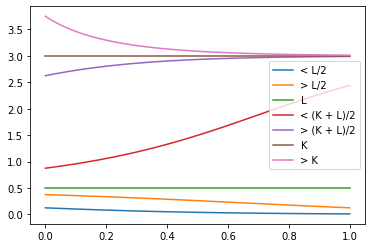

In [47]:
import matplotlib.pyplot as plt

t0 = 0
t1 = 0.5
fig, ax = plt.subplots()
lines=[]

for ind, opt in enumerate(options):
    N0 = opt[0]
    def_text = opt[1]
    N, t = solve(N0, h=0.01)
    lines.append(ax.plot(t, N, label=def_text)[0])

ax.legend(handles=lines)
plt.show()

# <center>Частина ІI</center>

$$ \frac{dN}{dt} = 0.125 * N - 0.001 * N^2 $$

In [48]:
options = [
    [100, "N(0) = 100"],
    [140, "N(0) = 140"],
    [180, "N(0) = 180"]
]
t1 = 20

def f(t, N):
    return 0.125 * N - 0.001 * (N**2)

def solve(N0, t0=0, t1=1, h=0.05):
    r = ode(f).set_integrator('vode', method='bdf')
    r.set_initial_value(N0, t0)
    
    N = [N0]
    t = [t0]
    
    while r.successful() and r.t < t1:
        t.append(r.t + h)
        N.append(r.integrate(r.t + h))
    return N, t

<Figure size 432x288 with 0 Axes>

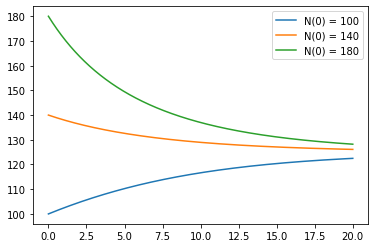

In [49]:
plt.gcf().clear()
fig, ax = plt.subplots()
lines = []
for ind, opt in enumerate(options):
    N0 = opt[0]
    def_text = opt[1]
    N, t = solve(N0, t0=0, t1=t1, h=0.01)
    lines.append(ax.plot(t, N, label=def_text)[0])
    
ax.legend(handles=lines)
plt.show()